In [ ]:
import numpy as np
import random
import gym

# 환경 설정
env = gym.make('FrozenLake-v1')

# Q-테이블 초기화
Q = np.zeros([env.observation_space.n, env.action_space.n])
print("초기 Q-테이블:")
print(Q)

# 매개변수 설정
learning_rate = 0.8
discount_factor = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
total_episodes = 1000

# 에이전트의 행동 선택 함수
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # 무작위 행동
    else:
        return np.argmax(Q[state, :])  # 최적의 행동

# Q-학습 알고리즘
for episode in range(total_episodes):
    state = env.reset()
    done = False

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)

        # Q-테이블 업데이트
        Q[state, action] = Q[state, action] + learning_rate * (reward + discount_factor * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

    # Epsilon 값을 줄임
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# 학습된 Q-테이블 출력
print("학습된 Q-테이블:")
print(Q)

초기 Q-테이블:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
학습된 Q-테이블:
[[7.14743395e-02 2.27173828e-02 1.61322139e-02 2.13797289e-02]
 [4.98284432e-03 2.50063503e-05 8.09605259e-03 1.22424021e-02]
 [1.98391965e-02 4.81913394e-03 6.91938895e-03 6.54486383e-03]
 [2.49551592e-03 3.02360261e-04 1.20140389e-03 6.68918154e-03]
 [1.03010203e-01 2.06022814e-02 8.07590832e-03 9.48347166e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.93691439e-01 0.00000000e+00 2.77504324e-04 4.47052665e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.12945294e-02 4.56360890e-03 2.26097391e-03 1.94307193e-01]
 [2.16527619e-02 4.22041430e-01 6.15945544e-03 1.04717256e-02]
 [1.42630186e-01 1.28641875e-01 8.09225937e-03 6.76181185e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+0

초기 Q-테이블:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
학습된 Q-테이블:
[[1.26036670e-02 1.17407364e-02 1.23890281e-02 8.31044939e-03]
 [9.27032085e-04 1.54784993e-03 1.96850006e-03 8.96133156e-02]
 [4.55965059e-02 1.43575029e-03 5.61230275e-03 4.57049035e-03]
 [3.29237619e-03 2.00081942e-03 2.12006802e-04 7.73908978e-02]
 [2.60081337e-01 1.02615111e-02 4.88643104e-03 3.87208693e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.06704266e-05 4.11356115e-05 5.96037443e-03 1.12312710e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.06319559e-02 1.36813971e-03 4.29001177e-03 1.36504525e-01]
 [5.87620037e-03 5.51263318e-03 1.94902207e-02 2.19973201e-03]
 [5.58567988e-01 6.65809985e-04 7.09947479e-04 1.50850921e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+0

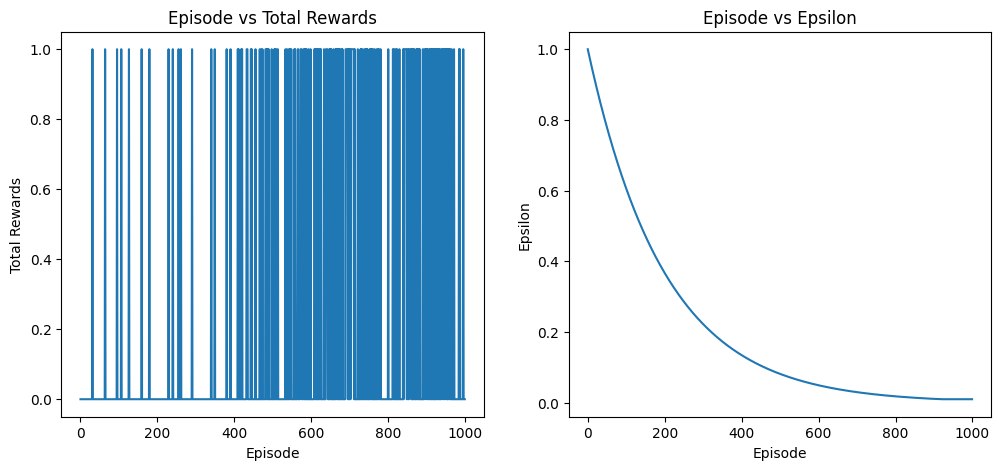

In [ ]:
import numpy as np
import random
import gym
import matplotlib.pyplot as plt

# 환경 설정
env = gym.make('FrozenLake-v1')

# Q-테이블 초기화
Q = np.zeros([env.observation_space.n, env.action_space.n])
print("초기 Q-테이블:")
print(Q)

# 매개변수 설정
learning_rate = 0.8
discount_factor = 0.95
epsilon = 1.0
epsilon_min = 0.01
epsilon_decay = 0.995
total_episodes = 1000

# 보상과 epsilon 변화를 추적하기 위한 리스트
rewards = []
epsilons = []

# 에이전트의 행동 선택 함수
def choose_action(state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # 무작위 행동
    else:
        return np.argmax(Q[state, :])  # 최적의 행동

# Q-학습 알고리즘
for episode in range(total_episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = choose_action(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        total_reward += reward

        # Q-테이블 업데이트
        Q[state, action] = Q[state, action] + learning_rate * (reward + discount_factor * np.max(Q[next_state, :]) - Q[state, action])

        state = next_state

    # 보상과 epsilon 추가
    rewards.append(total_reward)
    epsilons.append(epsilon)

    # Epsilon 값을 줄임
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

# 학습된 Q-테이블 출력
print("학습된 Q-테이블:")
print(Q)

# 보상과 epsilon 변화 시각화
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(rewards)
plt.title('Episode vs Total Rewards')
plt.xlabel('Episode')
plt.ylabel('Total Rewards')

plt.subplot(122)
plt.plot(epsilons)
plt.title('Episode vs Epsilon')
plt.xlabel('Episode')
plt.ylabel('Epsilon')
plt.show()

In [ ]:
import gym

# 환경 생성
env = gym.make('FrozenLake-v1', render_mode='human', map_name='8x8')

# 첫 번째 에피소드 시작
state = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # 무작위 행동 선택
    state, reward, done, info = env.step(action)  # 행동 실행
    print(state,reward,done, info)

env.close()  # 환경 종료

0 0.0 False {'prob': 0.3333333333333333}
8 0.0 False {'prob': 0.3333333333333333}
8 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
8 0.0 False {'prob': 0.3333333333333333}
8 0.0 False {'prob': 0.3333333333333333}
9 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
2 0.0 False {'prob': 0.3333333333333333}
2 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
0 0.0 False {'prob': 0.3333333333333333}
8 0.0 False {'prob': 0.3333333333333333}
9 0.0 False {'prob': 0.3333333333333333}
1 0.0 False {'prob': 0.3333333333333333}
2 0.0 False {'prob': 0.3333333333333333}
3 0.0 False {'prob': 0.3333333333333333}
2 0.0 False {'prob': 0.3333333333333333}
10 0.0 False {'prob': 0.3333333333333333}
2 0.0 False {'prob': 0.3333333333333333}
2 0.0 False {'prob': 0.3333333333333333}
2 0.0 False {'prob': 0.3333333333333333}
3 0.0 False {'p

In [ ]:
import gym

# 환경 생성
env = gym.make('FrozenLake-v1', render_mode='human', map_name='4x4')

# 첫 번째 에피소드 시작
state = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # 무작위 행동 선택
    state, reward, done, info = env.step(action)  # 행동 실행
    print(action, state,reward,done, info)

env.close()  # 환경 종료

0 0 0.0 False {'prob': 0.3333333333333333}
3 0 0.0 False {'prob': 0.3333333333333333}
3 1 0.0 False {'prob': 0.3333333333333333}
3 2 0.0 False {'prob': 0.3333333333333333}
2 3 0.0 False {'prob': 0.3333333333333333}
3 2 0.0 False {'prob': 0.3333333333333333}
3 1 0.0 False {'prob': 0.3333333333333333}
3 1 0.0 False {'prob': 0.3333333333333333}
1 0 0.0 False {'prob': 0.3333333333333333}
2 0 0.0 False {'prob': 0.3333333333333333}
3 0 0.0 False {'prob': 0.3333333333333333}
0 0 0.0 False {'prob': 0.3333333333333333}
2 1 0.0 False {'prob': 0.3333333333333333}
3 2 0.0 False {'prob': 0.3333333333333333}
1 3 0.0 False {'prob': 0.3333333333333333}
2 3 0.0 False {'prob': 0.3333333333333333}
3 3 0.0 False {'prob': 0.3333333333333333}
0 3 0.0 False {'prob': 0.3333333333333333}
1 2 0.0 False {'prob': 0.3333333333333333}
0 6 0.0 False {'prob': 0.3333333333333333}
2 2 0.0 False {'prob': 0.3333333333333333}
2 2 0.0 False {'prob': 0.3333333333333333}
1 3 0.0 False {'prob': 0.3333333333333333}
0 2 0.0 Fal